# Исследование взаимосвязей переменных

In [1]:
import pandas as pd

Данные о файле:  https://www.kaggle.com/hesh97/titanicdataset-traincsv

Описание переменных:

    PassengerId - id пассажира
    Survived бинарная переменная: выжил пассажир (1) или нет (0)
    Pclass - класс пассажира
    Name - имя пассажира
    Sex - пол пассажира
    Age - возраст пассажира
    SibSp - количество родственников (братьев, сестер, супругов) пассажира на борту
    Parch - количество родственников (родителей / детей) пассажира на борту
    Ticket - номер билета
    Fare - тариф (стоимость билета)
    Cabin - номер кабины
    Embarked - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q - Queenstown)

In [2]:
titanic = pd.read_csv('titanic.csv', index_col=0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Таблицы сопряжённости

Подробнее по ссылке: https://pbpython.com/pandas-crosstab.html

In [3]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [4]:
titanic.groupby('Sex')['Pclass'].value_counts().unstack() #в ячейках частоты

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [5]:
titanic.groupby('Sex')['Pclass'].value_counts(normalize=True).unstack() #в ячейках проценты

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [6]:
print(0.299363 + 0.242038 + 0.458599) 
print(0.211438 + 0.187175 + 0.601386) 

1.0
0.999999


In [7]:
pd.crosstab(titanic['Pclass'], titanic['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [8]:
pd.crosstab(titanic['Pclass'], titanic['Sex'], margins=True) #добавлены суммы по строкам и столбцам

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [9]:
pd.crosstab(titanic['Pclass'], titanic['Sex'], margins=True, margins_name='Total') #All заменено на Total

Sex,female,male,Total
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
Total,314,577,891


In [10]:
pd.crosstab(titanic['Pclass'], titanic['Sex'], margins=True, margins_name='Total', normalize=True) 
#проценты вместо частот

Sex,female,male,Total
Pclass,,,
1,0.105499,0.136925,0.242424
2,0.085297,0.121212,0.206510
3,0.161616,0.389450,0.551066
Total,0.352413,0.647587,1.000000


In [11]:
print(0.242424 + 0.206510 + 0.551066)
print(0.352413 + 0.647587)
print(0.105499 + 0.136925 + 0.085297 + 0.121212 + 0.161616 + 0.389450)

1.0
1.0
0.9999990000000001


Можно сделать вывод, что более половины (55%) всех пассажиров плыли третьим классом. Большинство (65%) пассажиров были мужчины. Самая многочисленная подгруппа - мужчины из 3-го класса. Они составляют 39% от всех пассажиров.  

In [12]:
pd.crosstab(titanic['Pclass'], titanic['Sex'], margins=True, margins_name='Total', normalize='columns')
#процент по столбцам

Sex,female,male,Total
Pclass,,,
1,0.299363,0.211438,0.242424
2,0.242038,0.187175,0.206510
3,0.458599,0.601386,0.551066


По этим данным можно сделать вывод о процентном распределении пассажиров по классам в 3-х разных группах:
- мужчин, 
- женщин, 
- всех пассажиров.

Можно сделать вывод, что во всех трёх группах большинство плыли 3-м классом. Среди мужчин 3-м классом плыли 60% пассажиров, а среди женщин - 46%. В группе женщин самый высокий процент пассажиров, плывших 1-м классом (30% от всех женщин).

In [13]:
print(0.299363 + 0.242038 + 0.458599)
print(0.211438 + 0.187175 + 0.601386)
print(0.242424 + 0.206510 + 0.551066)

1.0
0.999999
1.0


In [14]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], margins=True, margins_name='Total', normalize='columns')
#процент по столбцам, переменные поменялись местами

Pclass,1,2,3,Total
Sex,,,,
female,0.435185,0.413043,0.293279,0.352413
male,0.564815,0.586957,0.706721,0.647587


In [15]:
pd.crosstab(titanic['Pclass'], titanic['Sex'], margins=True, margins_name='Total', normalize='index')
#переменные не меняем местами, но устанавливаем параметр normalize='index'
#получаем процент по строкам

Sex,female,male
Pclass,,
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721
Total,0.352413,0.647587


По этим данным можно сделать вывод о процентном распределении пассажиров по полу в 4-х разных группах:
- среди плывших 1-м классом, 
- среди плывших 2-м классом,
- среди плывших 3-м классом, 
- среди всех пассажиров.

Можно сделать вывод, что максимальная доля женщин среди пассажиров 1-го класса (44%), а минимальная среди пассажиров 3-го класса (29%).


<Axes: xlabel='Sex'>

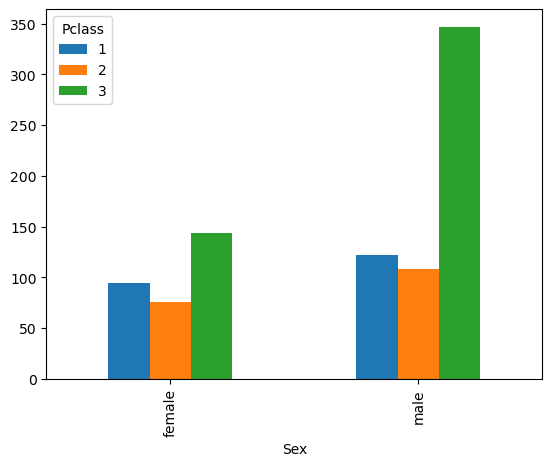

In [16]:
titanic.groupby('Sex')['Pclass'].value_counts().unstack().plot(kind='bar')
#столбчатая диаграмма с группировкой
#длина столбцов отражает частоту

<Axes: xlabel='Sex'>

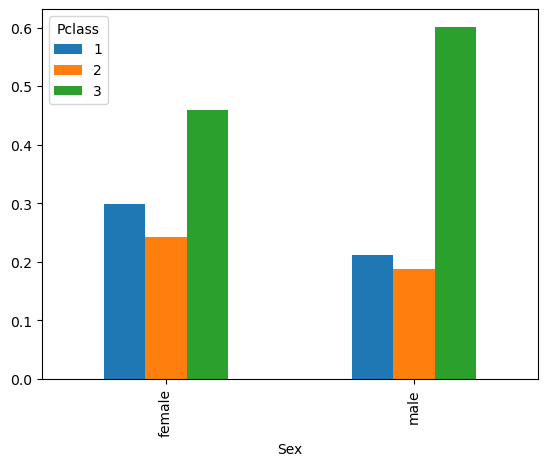

In [17]:
titanic.groupby('Sex')['Pclass'].value_counts(normalize=True).unstack().plot(kind='bar')
#столбчатая диаграмма с группировкой
#длина столбцов отражает процент

<Axes: xlabel='Pclass'>

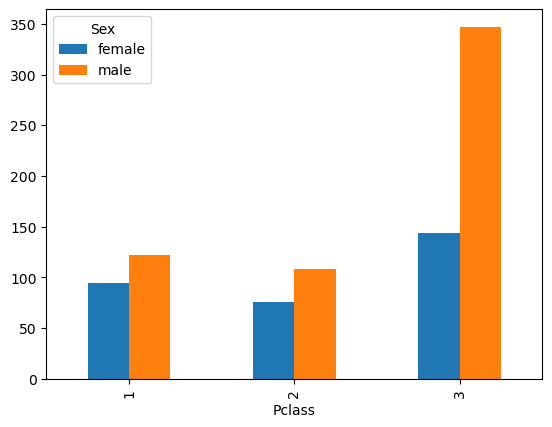

In [18]:
titanic.groupby('Pclass')['Sex'].value_counts().unstack().plot(kind='bar')
#группирующая и основная переменная заменены местами
#длина столбцов отражает частоту

<Axes: xlabel='Pclass'>

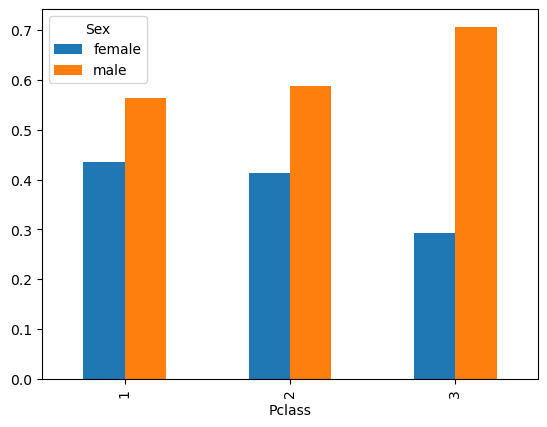

In [19]:
titanic.groupby('Pclass')['Sex'].value_counts(normalize=True).unstack().plot(kind='bar')
#группирующая и основная переменная заменены местами
#длина столбцов отражает процент

# Хи-квадрат

In [20]:
ct_survive_sex = pd.crosstab(titanic['Pclass'], titanic['Sex'])
ct_survive_sex
# сохраним таблицу сопряжённости в переменную 

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [21]:
from scipy import stats 
stats.chi2_contingency(ct_survive_sex)

Chi2ContingencyResult(statistic=16.971499095517114, pvalue=0.00020638864348233114, dof=2, expected_freq=array([[ 76.12121212, 139.87878788],
       [ 64.84399551, 119.15600449],
       [173.03479237, 317.96520763]]))

chi2 = 16.971499095517114

p-value = 0.00020638864348233114

df=2

array - матрица ожидаемых частот

In [22]:
print('chi2 = ', stats.chi2_contingency(ct_survive_sex)[0], '   p-value =', stats.chi2_contingency(ct_survive_sex)[1])

chi2 =  16.971499095517114    p-value = 0.00020638864348233114


## Выводы

H1: существует взаимосвязь между полом пассажира и тем каким классом он плыл

p-value = 0.0002 < 0.05

p-value = 0.0002 < 0.01

Гипотеза H1 принимается на уровне значимости 5%.

Гипотеза H1 принимается на уровне значимости 1%.

# Тесты на нормальность

## Тест на нормальность Шапиро-Вилка

*!!! Обратите внимание, что для нашей выборки больше подходит тест Колмогорова-Смирнова, поскольку размер выборки превышает 50. В данном примере используется тест Шапиро-Вилка для демонстрации его работы.*

In [23]:
stats.shapiro(titanic.SibSp) # Второе число – это значимость и она сильно меньше 0.05.
# Значит, такое распределение отличается от нормального

ShapiroResult(statistic=0.5129655003547668, pvalue=5.74532370373175e-44)

In [24]:
stats.shapiro(titanic.SibSp).statistic

0.5129655003547668

In [25]:
stats.shapiro(titanic.SibSp).pvalue

5.74532370373175e-44

H1: Распределение значений переменной SibSp отличается от нормального распределения

Вывод: поскольку p-vale < 0.05, гипотеза H1 принимается

## Тест на нормальность Колмогорова-Смирнова

In [26]:
#исключаем пассажиров, возраст которых не известен, иначе не сможем провести тест
stats.kstest(titanic.Age.dropna(), 'norm', args=(titanic.Age.mean(), titanic.Age.std()))

KstestResult(statistic=0.06456656793494475, pvalue=0.004958146899084225, statistic_location=30.0, statistic_sign=1)

H1: Распределение возраста пассажиров отличается от нормального распределения

Вывод: поскольку p-value < 0.05, гипотеза H1 принимается

# Корреляция

*!!! Обратите внимание, что ниже приведены варианты расчёта разных коэффициентов корреляции для демонстрации технических возможностей библиотек Python. При необходимости расчёта коэффициента корреляции между конкретной парой переменных необходимо сначала выбрать подходящий коэффициент, а затем рассчитать его.*

### Коэффициент корреляции Пирсона

In [29]:
titanic = pd.read_csv('titanic.csv', index_col=0)
titanic.corr(numeric_only=True) #рассчитываются коэффициенты корреляции Пирсона между всеми возможными парами числовых переменных
#по диагонали всегда 1, это корреляция переменной с самой собой

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [30]:
titanic['Age'].corr(titanic['Fare']) #коэффициент корреляции Пирсона между парой переменных

0.09606669176903888

<Axes: xlabel='Age', ylabel='Fare'>

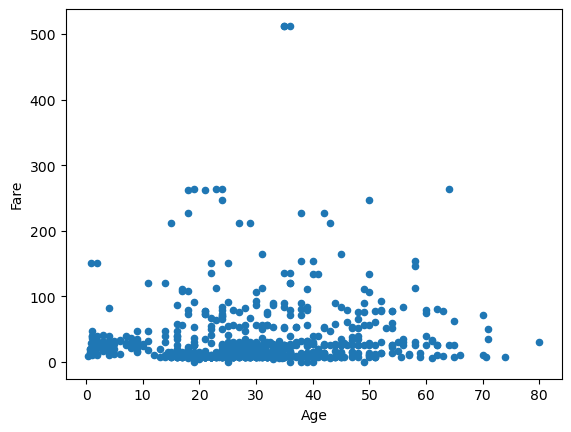

In [31]:
titanic.plot('Age', 'Fare', kind='scatter') #диаграмма рассеяния

In [32]:
titanic[['Fare','SibSp','Parch']].corrwith(titanic['Age'])
#коэффициенты корреляции Пирсона между переменной Age и переменными 'Fare','SibSp','Parch'

Fare     0.096067
SibSp   -0.308247
Parch   -0.189119
dtype: float64

In [33]:
titanic[['Fare','SibSp','Parch']].corrwith(titanic['Age']).sort_values()
#коэффициенты корреляции отсортированы по возрастанию значений

SibSp   -0.308247
Parch   -0.189119
Fare     0.096067
dtype: float64

In [34]:
titanic[['Fare','SibSp','Parch', 'Age']].corr()
#матрица коэффициентов корреляции Пирсона на основе 4-х переменных

,Fare,SibSp,Parch,Age
Fare,1.000000,0.159651,0.216225,0.096067
SibSp,0.159651,1.000000,0.414838,-0.308247
Parch,0.216225,0.414838,1.000000,-0.189119
Age,0.096067,-0.308247,-0.189119,1.000000


In [35]:
titanic[['Fare','SibSp','Parch', 'Age']].corr().stack()
#все возможные пары корреляций, но не в форме матрицы

Fare   Fare     1.000000
       SibSp    0.159651
       Parch    0.216225
       Age      0.096067
SibSp  Fare     0.159651
       SibSp    1.000000
       Parch    0.414838
       Age     -0.308247
Parch  Fare     0.216225
       SibSp    0.414838
       Parch    1.000000
       Age     -0.189119
Age    Fare     0.096067
       SibSp   -0.308247
       Parch   -0.189119
       Age      1.000000
dtype: float64

In [36]:
titanic[['Fare','SibSp','Parch', 'Age']].corr().stack().sort_values()
#коэффициенты корреляции отсортированы по возрастанию 

SibSp  Age     -0.308247
Age    SibSp   -0.308247
Parch  Age     -0.189119
Age    Parch   -0.189119
Fare   Age      0.096067
Age    Fare     0.096067
Fare   SibSp    0.159651
SibSp  Fare     0.159651
Fare   Parch    0.216225
Parch  Fare     0.216225
SibSp  Parch    0.414838
Parch  SibSp    0.414838
Fare   Fare     1.000000
SibSp  SibSp    1.000000
Parch  Parch    1.000000
Age    Age      1.000000
dtype: float64

### Коэффициент корреляции Пирсона и его значимость

In [37]:
stats.pearsonr(titanic.SibSp, titanic.Fare)

PearsonRResult(statistic=0.15965104324216087, pvalue=1.6712557684699928e-06)

In [38]:
 print("Pearson's r:", stats.pearsonr(titanic.SibSp, titanic.Fare)[0], '    p-value:', stats.pearsonr(titanic.SibSp, titanic.Fare)[1])

Pearson's r: 0.15965104324216087     p-value: 1.6712557684699928e-06


H1: Существует взаимосвязь между количеством родственников (братьев, сестер, супругов) пассажира на борту и стоимостью билета (r != 0)

1. Статистическая значимость взаимосвязи: поскольку p-value < 0.05, гипотеза H1 подтвердилась.
2. Направление взаимосвязи: коэффициент корреляции положительный, следовательно, между переменными наблюдается прямая взаимосвязь.
3. Сила взаимосвязи: коэффициент корреляции равен 0.16, следовательно, между переменными наблюдается очень слабая корреляция. 

### Коэффициент корреляции Спирмена и его значимость

In [39]:
titanic = titanic.dropna(subset=['Age']) #удаляем пассажиров, возраст которых не известен
stats.spearmanr(titanic.Age, titanic.Fare)

SignificanceResult(statistic=0.1350512177342878, pvalue=0.00029580903243060916)

H1: Существует взаимосвязь между возрастом пассажира и стоимостью билета (r != 0)

1. Статистическая значимость взаимосвязи: поскольку p-value < 0.05, гипотеза H1 подтвердилась.
2. Направление взаимосвязи: коэффициент корреляции положительный, следовательно, между переменными наблюдается прямая взаимосвязь.
3. Сила взаимосвязи: коэффициент корреляции равен 0.14, следовательно, между переменными наблюдается очень слабая корреляция. 

In [40]:
titanic[['Age','Fare','SibSp']].corr('spearman') #матрица коэффициентов корреляции Спирмена

,Age,Fare,SibSp
Age,1.000000,0.135051,-0.182061
Fare,0.135051,1.000000,0.422994
SibSp,-0.182061,0.422994,1.000000


### Коэффициент корреляции Кендалла и его значимость

In [41]:
titanic = pd.read_csv('titanic.csv', index_col=0) #заново считываем данные из файла
stats.kendalltau(titanic.Pclass, titanic.Fare)

SignificanceResult(statistic=-0.5735307309748154, pvalue=9.184809170979601e-106)

H1: Существует взаимосвязь между классом, которым плыл пассажир и стоимостью билета (r != 0)

1. Статистическая значимость взаимосвязи: поскольку p-value < 0.05, гипотеза H1 подтвердилась.
2. Направление взаимосвязи: коэффициент корреляции отрицательный, следовательно, между переменными наблюдается обратная взаимосвязь. Содержательно это означает, что чем выше класс (ниже значение переменной Pclass, тем дороже билет).
3. Сила взаимосвязи: коэффициент корреляции равен 0.57, следовательно, между переменными наблюдается средняя корреляция. 

In [42]:
titanic[['Pclass','Fare','SibSp']].corr('kendall') #матрица коэффициентов корреляции Кендалла

,Pclass,Fare,SibSp
Pclass,1.000000,-0.573531,-0.039552
Fare,-0.573531,1.000000,0.358262
SibSp,-0.039552,0.358262,1.000000


# Частная корреляция

Рассчитаем парную корреляцию между переменными SibSp и Parch

In [21]:
pip install pingouin

     |████████████████████████████████| 198 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 5.6 MB/s eta 0:00:011
     |████████████████████████████████| 994 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 1.2 MB/s eta 0:00:01
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=0e4532927d797feaa6426be423ee525f62f6820e87046e47f5adfdf89d860adf
  Stored in directory: /Users/alice/Library/Caches/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: pandas
    Found existing installat

In [43]:
import pingouin as pg #импортируем библиотеку

In [44]:
stats.pearsonr(titanic.SibSp, titanic.Parch)[0]

0.414837698620156

Теперь проконтролируем влияние на эту корреляцию переменной Fare

In [45]:
from math import sqrt #импортируем функцию sqrt из библиотеки math
r_xy = r_SibSp_Parch = stats.pearsonr(titanic.SibSp, titanic.Parch)[0]
r_xz = r_SibSp_Fare = stats.pearsonr(titanic.SibSp, titanic.Fare)[0]
r_yz = r_Parch_Fare = stats.pearsonr(titanic.Parch, titanic.Fare)[0]
r_xy_z = (r_xy - r_xz * r_yz) / sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))
print('Парный коэффициент корреляции между SibSp и Parch: ',r_xy)
print('Частный коэффициент корреляции между SibSp и Parch, исключив влияние переменной Fare: ',r_xy_z)

Парный коэффициент корреляции между SibSp и Parch:  0.414837698620156
Частный коэффициент корреляции между SibSp и Parch, исключив влияние переменной Fare:  0.39459334459200046


In [46]:
pg.partial_corr(data=titanic, x='SibSp', y='Parch', covar='Fare') #частный коэффициент корреляции (по умолчанию Пирсона)

,n,r,CI95%,p-val
pearson,891,0.394593,"[0.34, 0.45]",1.557889e-34


In [47]:
pg.partial_corr(data=titanic, x='SibSp', y='Parch', covar='Fare', method = 'spearman') 
#частный коэффициент корреляции Спирмена

,n,r,CI95%,p-val
spearman,891,0.326871,"[0.27, 0.38]",1.320841e-23


Рассмотрим результаты исследования отношения к приезжим рабочим, проведенного в Германии.
	
    3 переменные:
	1) Возраст (age);
	2) Отношение к приезжим рабочим (newcomer, от 0 до 30, чем больше значение, тем более негативное отношение);
	3) Частота посещения церкви (church, 1-никогда, 6-по меньшей мере 2 раза в неделю). 


In [48]:
df = pd.read_stata('partial.dta')
df

,age,church,newcomer
0,56,4,17
1,80,5,16
2,64,4,19
3,65,5,19
4,48,3,17
5,41,3,14
6,44,4,21
7,43,2,16
8,57,4,17
9,62,5,18


Рассчитаем корреляцию между частотой посещения церкви и отношением к приезжим рабочим.

In [49]:
stats.pearsonr(df.church, df.newcomer)
#корреляция средне-слабая, статистически значимая

PearsonRResult(statistic=0.43153224514005806, pvalue=0.009643009747479421)

Следовательно, чем чаще респондент посещает церковь, тем хуже он относится к приезжим рабочим. Проконтролируем влияние возраста.

In [50]:
r_xy = stats.pearsonr(df.church, df.newcomer)[0]
r_xz = stats.pearsonr(df.church, df.age)[0]
r_yz = stats.pearsonr(df.newcomer, df.age)[0]
r_xy_z = (r_xy - r_xz * r_yz) / sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))
print('Парный коэффициент корреляции между church и newcomer: ',r_xy)
print('Частный коэффициент корреляции между church и newcomer, исключив влияние переменной age: ',r_xy_z)

Парный коэффициент корреляции между church и newcomer:  0.43153224514005806
Частный коэффициент корреляции между church и newcomer, исключив влияние переменной age:  0.12149014994424978


In [51]:
pg.partial_corr(data=df, x='church', y='newcomer', covar='age')

,n,r,CI95%,p-val
pearson,35,0.12149,"[-0.23, 0.44]",0.493692


Корреляция стала значительно меньше. Скорее всего негативное отношение более свойственно пожилым людям, но так получилось, что они чаще посещают церковь.

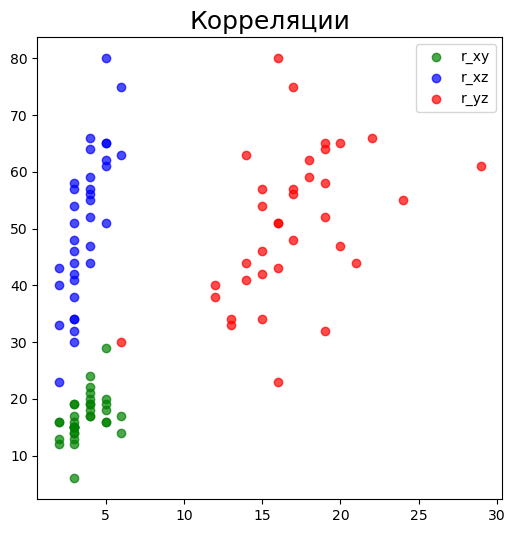

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

plt.scatter(df.church, df.newcomer, c='g', alpha=0.7, label='r_xy')
plt.scatter(df.church, df.age, c='b', alpha=0.7, label='r_xz')
plt.scatter(df.newcomer, df.age, c='r', alpha=0.7, label='r_yz')
plt.title('Корреляции', fontsize=18)
plt.legend()

plt.show()

# Визуализация корреляций

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
corr = titanic.dropna().corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


<Axes: >

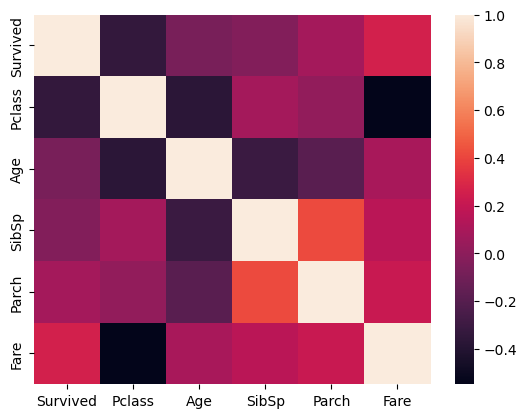

In [57]:
sns.heatmap(titanic.corr(numeric_only=True)) #тепловая карта

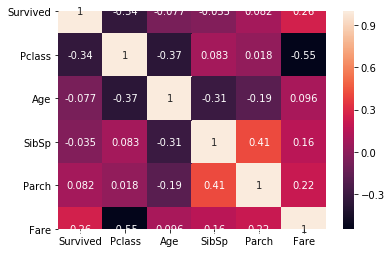

In [55]:
sns.heatmap(titanic.corr(), annot=True) #метки значений

<Axes: >

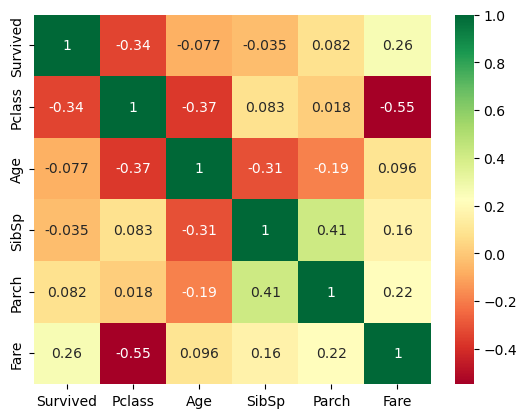

In [58]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='RdYlGn') #другая цветовая шкала

<Axes: >

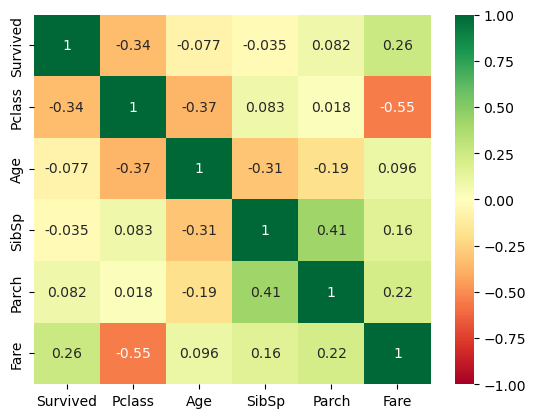

In [59]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='RdYlGn', vmax=1, vmin=-1) 
#заданы минимальные и максимальные значения шкалы

<Axes: >

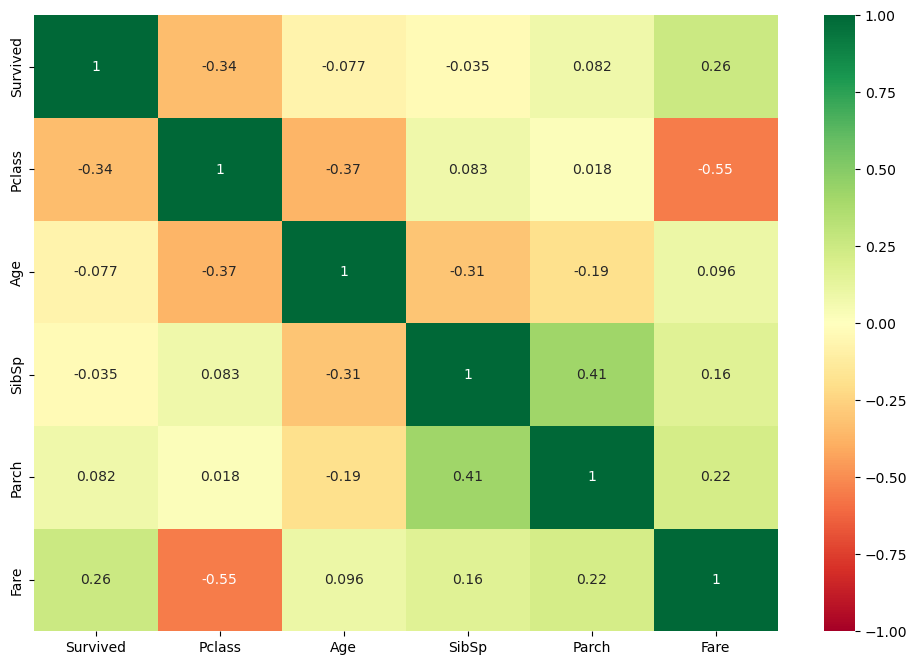

In [60]:
plt.figure(figsize=(12,8)) #скорректирован размер
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='RdYlGn', vmax=1, vmin=-1)

/Users/alice/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alice/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alice/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alice/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

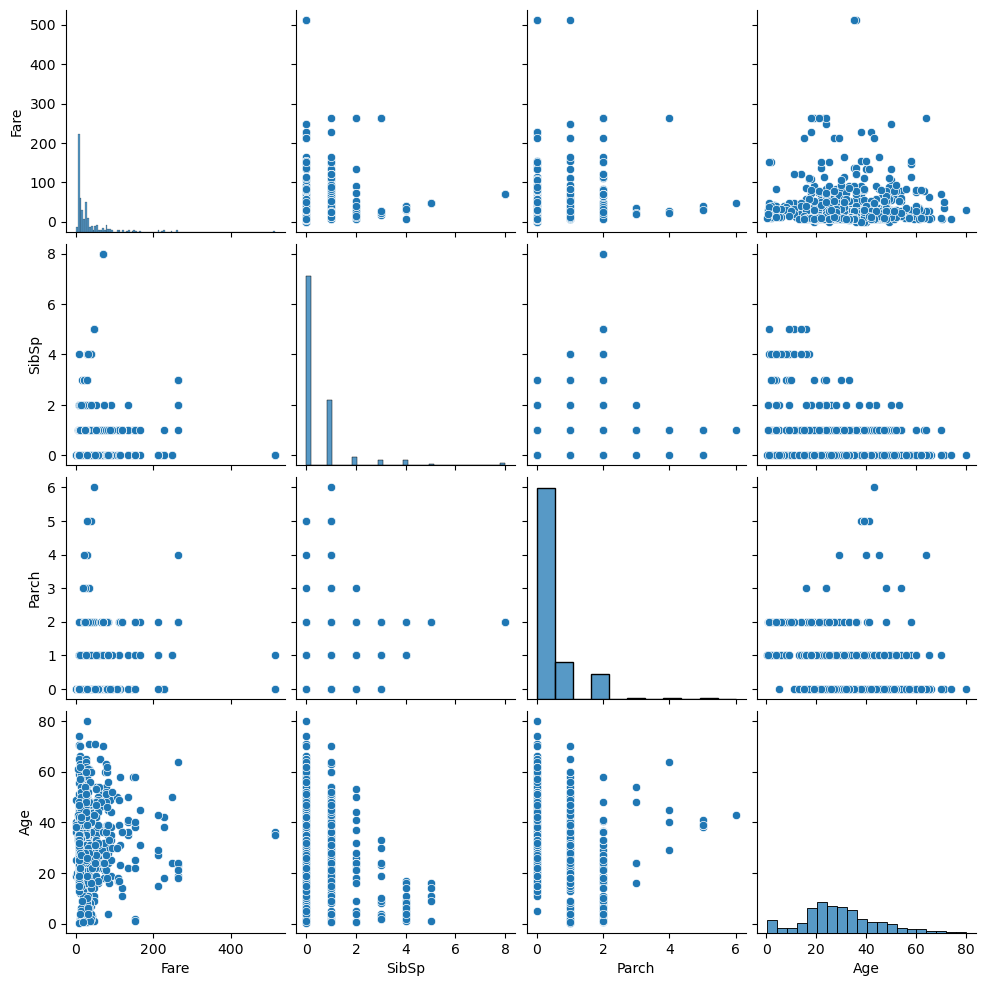

In [61]:
sns.pairplot(titanic[['Fare','SibSp','Parch', 'Age']]) #матрица диаграмм рассеяния